# Projet Algorithmique avancée - Livrable 2 - Groupe 4

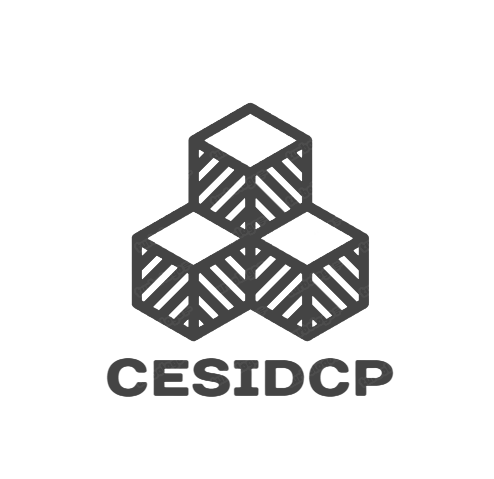 

## Contexte

CesiCDP répond à l'appel de l'ADEME pour développer des solutions de mobilité innovantes. L'objectif est d'optimiser les tournées de livraison de frigos américains sur un réseau routier, en tenant compte des variations de trafic. Le défi réside dans l'application de méthodes de recherche opérationnelle pour minimiser la durée totale de la tournée. Le projet, s'il est réussi, pourrait offrir à CesiCDP des opportunités de marché lucratives et un financement intéressant. 


## Présentation du groupe projet

Nous sommes l'équipe mise en place par CesiCDP afin de répondre à l'appel de l'ADEME, Samuel JARJANETTE est le chef de projet, et son équipe se constitue de 4 autres éléments, Pierre MARTIN, Antoine CONGUISTI, Noé DELAVEAU et Théo MARCILLA. Nous avons pour mission d'étudier la gestion des tournées de livraison, dans le but d'obtenir de nouveaux marchés avec des financements permettant de développer notre activité. 

## Problématique

Comment calculer sur un réseau routier une tournée permettant de relier entre elles un sous-ensemble de villes, puis de revenir à son point de départ, de manière à minimiser la durée totale
de la tournée, tout en prenant en compte le trafic prévu sur chaque axe pour les différentes tranches horaires ? 

## Planification

Nous prévoyons de livrer une première version de notre réflexion sur le sujet le 6 juin, puis une seconde version sera livrée le 19 juin, puis nous présenterons les résultats de notre travail
lors d'une soutenance le 21 juin. 

## But du livrable 2

Le but de ce livrable est de présenter l'ensemble de la démarche réalisée, ainsi que la réalisation technique, pour enfin conclure sur les résultats obtenus. Nous ferons par la même occasion un rappel du précédent livrable, et nous le compléterons avec la démarche mathématique, ainsi que le code. 

# 4. Complexité

Soit **ICH** une instance du problème **Cycle Hamiltonien**, constitué du graphe G=(V,E).
Soit **IVdC** l’instance de **Voyageur de Commerce**

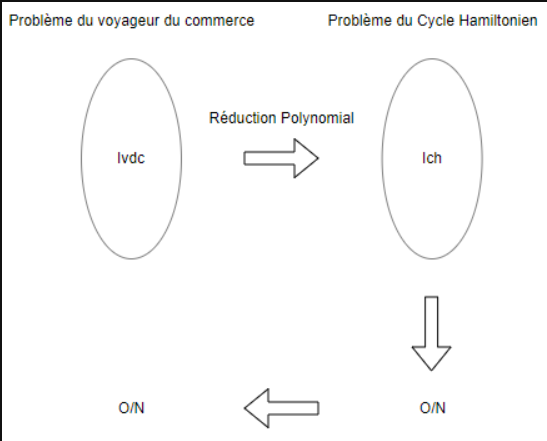



## 4.1. Algorithme de certificat

Le problème est dans **NP** car étant donné une suite de sommets, on peut vérifier en temps en temps linéaire : 

* si cette suite de sommets constitue bien un circuit : il faut vérifier qu’elle parcourt bien les sommets de proche en proche (chaque sommet est le voisin du précédent). Cette vérification se fait en temps linéaire. 

* si elle passe au moins une fois par chaque sommet. Cette vérification se fait en temps linéaire. 

* si son coût est inférieur à t : il faut faire la somme des valeurs des arêtes parcourues par le circuit, et vérifier si cette somme est inférieure à t. Cette vérification se fait en temps linéaire.

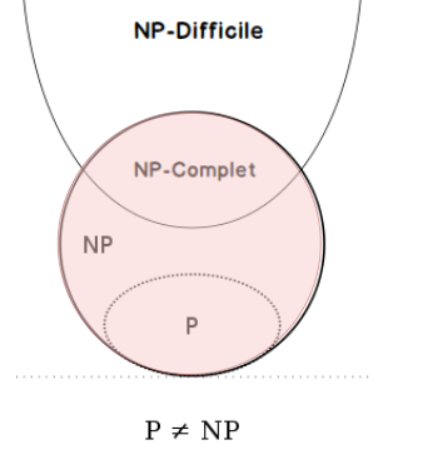

## 4.2. Réduction polynomial

Soit **IVdC** l’instance de Voyageur de Commerce, constitué du graphe G=(V,E) :

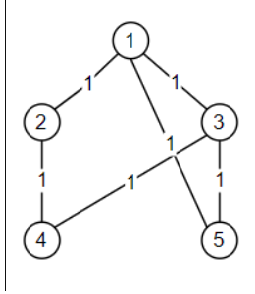

Soit ICH une instance du problème Cycle Hamiltonien, constitué du graphe G=(V,E) :

* le graphe arête-valué G ’=(V, E(G)+E(G ̅), v : E(G )+E(G ̅) ↦ ℕ) avec v(u)=1 ∀ u ∈ E(G ) et v(u)=2 ∀ u ∈ E(G ̅) (Rappel : G ̅ est le complémentaire de G, il contient les mêmes sommets, et toutes les arêtes qui ne sont pas dans G ).
* l’entier k=|V |-1

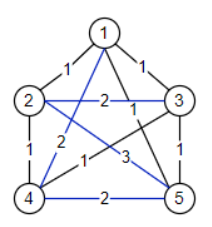

Cette instance se construit en temps polynomial : Rechercher toutes les combinaisons de sommets (origine, destination) non présentes dans G se fait en O(|V|²)
Supposons qu’il existe un algorithme résolvant Voyageur de Commerce en temps polynomial. En appliquant cet algorithme sur IVdC :
* Soit on obtient la réponse oui. Dans ce cas, on sait qu’il existe un cycle hamiltonien dans G. En effet, la solution de IVdC est un circuit de longueur |V |-1 par construction de IVdC. Ce circuit ne peut passer que par des arêtes de G, puisque celles de G ̅ ont un cout de 2, la longueur de cette solution serait supérieure à |V|-1. Par ailleurs, cette solution ne passe qu’une seule fois par chaque sommet, car sinon sa longueur serait supérieure à |V|-1. Ce circuit constitue donc un cycle hamiltonien dans G, la réponse à ICH est donc oui.
* Symétriquement, si la réponse est non, on en déduit qu’il n’existe pas de cycle hamiltonien dans G, car sinon il constituerait une solution à IVdC et la réponse serait oui.

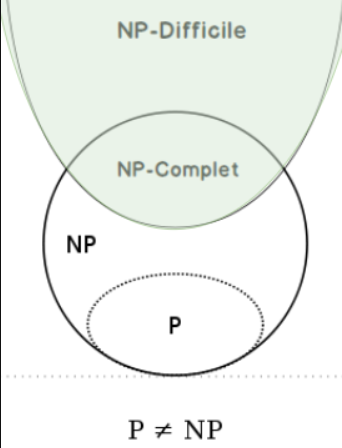

## 4.3. Compléxité de notre problème

On est capable de transformer en **temps polynomial** une instance de **Voyageur de Commerce** en instance de **Cycle Hamiltonien**, de manière à conserver la réponse, **Voyageur de Commerce** est au moins aussi difficile que **Cycle Hamiltonien**. Comme **Cycle Hamiltonien est NP-Complet**, et que **Voyageur de Commerce est dans NP**, **Voyageur de Commerce est NP-Complet**.

**Cycle hamiltonien ⩽ Voyageur de Commerce. Dans la mesure ou Voyageur de Commerce est dans NP, le problème est NP-Complet**.

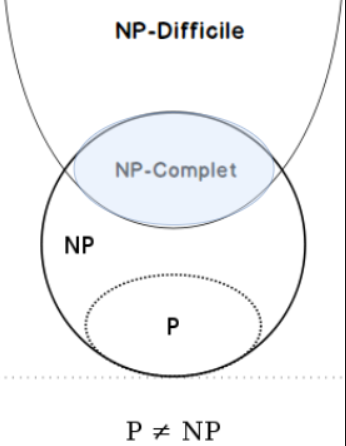

## Résolution du livrable

## *Rappels du livrable 1*

### Contraintes

Dans le domaine de la logistique, le transport d'électroménager représente un défi majeur en termes d'efficacité et d'optimisation des livraisons. Cette tâche complexe est encore plus difficile lorsqu'il est nécessaire de prendre en compte plusieurs contraintes simultanément, telles que la disponibilité limitée des camions, l'affectation des objets et des points de livraison, la capacité des véhicules ainsi que l'encombrement des objets à transporter. De plus, pour assurer une couverture nationale, il est essentiel de planifier les itinéraires de livraison dans toute la France Métropolitaine. Dans ce texte, nous allons donc présenter ces différentes contraintes et discuter des solutions possibles pour optimiser le transport de frigos. 

**Contrainte 1 :** Transport de frigos
Le transport de frigo nécessite des précautions particulières en raison de la nature fragile et encombrante des produits. Il est crucial de garantir que les objets sont manipulés avec soin tout au long du processus de livraison, afin de minimiser les risques de dommages. Cela peut impliquer l'utilisation de matériel de manutention spécialisé et de techniques d'emballage appropriées pour assurer la sécurité des produits pendant le transport. Les frigos sont de taille unique, et ne dépendent pas de la destination. La capacité est traitée au dépôt, et les camions sont chargés le plus possible. 

**Contrainte 2 :** Disponibilité limitée des camions
Une contrainte fréquente dans la logistique de livraison est la disponibilité limitée des camions. Dans ce contexte, il est important de maximiser l'utilisation des ressources en planifiant les tournées de livraison de manière efficace. Supposons qu'il y ait "k" camions disponibles simultanément pour effectuer les livraisons. Pour optimiser les itinéraires, il est essentiel d'affecter les objets et les points de livraison à ces différents camions de manière à minimiser la date de retour du dernier camion à la base. Cela permet de réduire les délais de livraison globaux et d'optimiser l'utilisation des véhicules. Aussi, les camions partent et rentrent au même dépot, situé dans une ville. 

**Contrainte 3 :** Capacité des camions et encombrement des objets
Une autre contrainte à prendre en compte est la capacité des camions et l'encombrement des objets à transporter. Les camions ont des limites de poids et de volume qu'il est nécessaire de respecter pour des raisons de sécurité routière et de respect des réglementations. Par conséquent, il est important d'optimiser l'affectation des objets aux camions en prenant en compte ces contraintes de capacité et d'encombrement afin d'optimiser l'utilisation de l'espace disponible dans les véhicules.

**Contrainte 4 :** Livraison dans toute la France Métropolitaine
La livraison d'électroménager doit généralement couvrir l'ensemble du territoire de la France Métropolitaine. Cela implique de planifier les itinéraires de manière à atteindre les différents points de livraison dans des délais raisonnables. Il est donc important d'optimiser la séquence des arrêts de livraison afin de minimiser les distances parcourues et les temps de trajet.

### Identification du problème


Dans le cadre du projet ADEME, nous rencontrons une problématique qui présente des similitudes avec le **problème du voyageur du commerce**.

En effet, le problème du voyageur du commerce est un problème d'optimisation où l'objectif est de trouver le plus court circuit qui passe par chaque ville une seule fois, en prenant en compte les distances entre les différentes paires de villes.

Dans notre cas, nous sommes confrontés à un problème de décision similaire au problème du voyageur du commerce. Nous devons déterminer s'il existe un circuit qui passe au moins une fois par chaque sommet de notre graphe G, et dont la somme des valeurs des arêtes est inférieure ou égale à une certaine valeur "eT".

On va donc poser le problème de décision ainsi que le problème d'optimisation. 
Un problème de décision demande de déterminer si une condition est satisfaite ou non, tandis qu'un problème d'optimisation vise à trouver la meilleure solution parmi un ensemble de possibilités en optimisant une fonction objectif.

**Problème de décision :**
Existe-t-il un circuit passant au moins une fois par chaque sommet de G et dont la somme des valeurs des arêtes est au plus "eT" ?

**Problème d'optimisation :**
Quel est la somme des valeurs des arêtes "e" pour laquelle il existe un circuit passant au moins par chaque sommet de G ?

Ainsi, le problème du projet ADEME se rapproche étroitement du problème du voyageur du commerce, tant dans sa version de décision que dans sa version d'optimisation. Cela nous amène à utiliser des techniques et des approches similaires pour résoudre notre problématique.

Or, avant de chercher à réaliser un algorithme de résolution, nous allons tout d'abord nous demander à quelle classe de complexité appartient ce problème. En effet, il est essentiel de déterminer la complexité d'un tel algorithme afin de savoir si nous pourrons réaliser le calcul de l'itinéraire dans un temps raisonnable. 

En particulier, l'enjeu va être de réaliser un algorithme "simple" de complexité polynomiale. Pour répondre à cette question, nous allons nous demander si le problème du voyageur du commerce est un problème P ou NP-complet. 

Pour qu'un algorithme soit de complexité P, il faut que 2 conditions soient remplises : 
- le calcul de la solution doit être réalisé avec un **algorithme de complexité polynomiale**
- la vérification du résultat doit également être réalisable en **temps polynomial**

A l'inverse pour qu'un problème soit catégorisé NP-complet, il est nécessaire que :
- la vérification du résultat doit être réalisable en **temps polynomial**
- il est possible, par le biais d'une opération de réduction polynomiale, de se ramener à un problème connu comme étant **NP-difficile**

Dans notre cas de figure, on remarque aisément que la vérification d'une solution peut être opérée par un algorithme de complexité polynomial. En effet, il nous suffit de vérifier qu'aucune ville (hormis la ville de départ) n'apparait plusieurs fois dans la liste des villes traversées par le voyageur. On peut rapidement se convaincre que pour réaliser cette vérification, nous n'avons besoin que d'un algorithme de complexité linéaire.

Notre problème appartient donc à la classe NP, cependant nous ne savons toujours pas dans quel cas nous nous trouvons. 

Par un raisonnement naïf, on se rend compte qu'il est nécessaire de recourir à un algorithme de complexité factorielle si l'on veut tester toutes les possibilités en "brute force". Ceci nous oriente plutôt vers un problème difficile à résoudre.

De plus, on peut noter que le problème du voyageur du commerce ressemble fortement à un problème connu comme étant un problème difficile : **le problème du cycle hamiltonien**. Il va donc falloir que nous démontrions que le cycle hamiltomien est équivalent à celui du voyageur du commerce modulo une réduction polynomiale. De cette manière, nous montrerions que le problème du voyageur du commerce est NP-complet et qu'il faudra orienter nos recherches vers des approximations du problème initial. 

Cette démonstration est aisée puisque l'on se rend compte que si l'on ajoute une valeur unitaire de 1 à chacune des arêtes d'un cycle hamiltonien, nous retombons sur notre problème. Cette réduction peut tout à fait être réalisée avec un algorithme polynomial.

On peut donc en conclure que nous avons affaire à un algorithme NP-complet et qu'il va falloir envisager des alternatives pour parvenir à répondre à notre problématique.

### Démonstration mathématique formelle de la réduction polynomiale

Considérons deux problèmes voisins, les versions de décision des problèmes
du voyageur de commerce (D-TSP) et de l’existence d’un circuit hamiltonien
dans un graphe (HC). <br/>
D-TSP <br/>
**Instance :** un ensemble V de villes, la matrice des distances inter-villes
(d<sub>i,j</sub>) et une constante "k". <br/>
Question : Déterminer s’il existe un parcours fermé, passant par toutes les
villes, de longueur inférieure à "eT". <br/>
Il est facile de démontrer que ces deux problèmes admettent un algorithme
de résolution exponentiel en considérant toutes les permutations possibles (en
comparant la somme de la longueur de leurs tours pour D-TSP). A ce jour, il
n’existe pas d’algorithmes polynomiaux connus pour résoudre ces problèmes, et
nombreux sont les informaticiens qui pensent qu’il n’en existe sans doute pas...
On peut réduire HC vers D-TSP (HC α D-TSP). <br/>
Décrivons un algorithme polynomial qui transforme une instance quelconque
de HC en une instance positive de D-TSP si et seulement si l’instance de HC
est positive.
L’instance est la suivante : l’ensemble des villes correspond aux sommets du
graphe G, les distances sont données par d<sub>i,j</sub> = 1 si i et j sont reliés dans G, 2
sinon. La constante "VT" est  ́egale au nombre de villes. <br/>
Cette transformation est polynomiale de manière  ́evidente. De plus, une
instance positive quelconque de HC fournit un cycle hamiltonien dans G. Ce
cycle correspond à un parcours de longueur n des n villes exactement une fois
chacune. Elle est positive pour D-TSP. <br/> Inversement, la réduction transforme les
instances positives de D-TSP en instances positives de HC. En effet, la solution
de D-TSP possède par définition des arêtes de coût unitaire puisque la longueur
totale est k, c’est donc aussi une solution de HC.

### Méthode de résolution :

Pour résoudre le problème, nous allons réaliser un graphe sur Python représentant une carte française où les villes sont des sommets avec les différentes routes que les livreurs pourront emprunter qui correspondraient aux arêtes. Ce graphe sera géneré sur Python. Pour pouvoir connaitre un chemin permettant de passer une seule fois sur chaque route, nous allons devoir nous assurer que le graphe remplisse certaines conditions.

En théorie des graphes, un parcours eulérien ou chemin eulérien, ou encore chaine eulérienne d'un graphe non orienté est un chemin qui passe par toutes les arêtes, une fois par arête. Pour qu’un graphe soit Eulérien, il doit remplir les conditions suivantes:

•Il admet un parcours eulérien si et seulement si ses sommets sont tous de degré pair sauf au plus deux.

•Il admet un cycle eulérien si et seulement si tous ses sommets sont de degré pair.

Notre but est d'optimiser au mieux notre code, pour ce faire nous allons utiliser une liste d'adjacence. Si les calculs sont trop compliqué, nous utiliserons des matrice d'adjacence. 

# *Modélisation mathématique*

### Notations mathématiques : 
 - *i* => node de départ / dépot
 - *j* => node arrivée / point suivant
 - *c* => véhicule
 - *eT* => distance nodes i à j
 - *vT* => nombre nodes / villes
 - *k* => nombre véhicules
 - *q* => demande client
 - *Q* => capacité véhiculée

Contraintes du programme :

- Tous les camions entrent et sortent dans chaque ville. Le nombre de fois qu'un véhicule entre dans un sommet est égal au nombre de fois qu'il quitte ce sommet : <br>
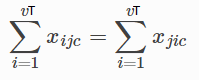 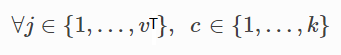

- Chaque camion passe une seule fois par ville. Chaque sommet est entrée qu'une seule fois : </br>
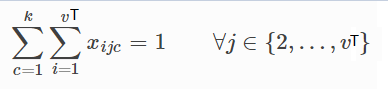
<br>

- Tous les véhicules partent du même endroit. Tout les véhicules quittent l'entrepôt : <br>
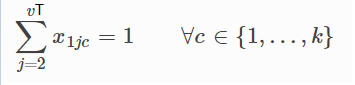
<br>

- Les capacités des camions sont respectées : <br>
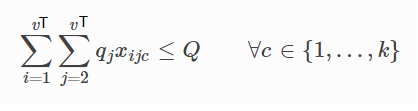
<br>

- Fonction économique : <br>
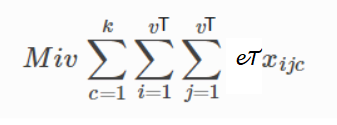

# *Algorithme*

In [1]:
# METTRE CODE ICI

# *Plan d'exécution*

In [ ]:
Plan expérimentation : 
    deux paramètres, 
    une explication pour les expérience réalisées
    cjppox mpgoqies des paramètres
    montrer qu'on sait faire avec deux ) on sait faire avec 3
    instance, temps d'ex&cution 
    qualité, selon nombre mutations
    si tout ça bienfait et bien interprété = win
    
    
    graphiques, phrase interprétation 

## 1 - Sélection des paramètres : 
    
Pour choisir les paramètres à modifier afin de tester la qualité de notre algorithme, nous avons du étudier nos paramètres et déterminer celui qui serait le plus pertinent à modifier. 

Voici la liste des paramètres : 
    
    - Nombre de villes
    - Nombre d'itérations
    - Mutation rate
    - Population size
    - Crossover rate
    
Modifier le **nombre de villes** rendra l'algorithme plus complexe, mais ne permettra pas de montrer une réelle différence de performance puisque les données de base changeront, ce n'est donc 
pas pertinent de sélectionner ce paramètre pour le modifier. 

Le **nombre d'itérations** quand à lui, va permettre de réaliser un plus grand nombre d'essais afin de déterminer une solution plus optimale, ce qui peut être intéressant à étudier.

La **population size** (ou taille de la population) influence directement la diversité génétique et l'efficacité de l'algorithme génétique. Une petite taille de population peut limiter l'exploration de l'espace des solutions et conduire à une convergence prématurée vers des minima locaux. En revanche, une grande taille de population peut augmenter le temps de calcul et la complexité de l'algorithme. Tester différentes tailles de population va donc permettre de trouver une taille permettant une exploration adéquate de l'espace des solutions, sans entraîner une surcharge de calculs. 

Le **mutation rate** (ou taux de mutation) jour un rôle crucial dans l'équilibre entre exploration et exploitation de l'algorithme génétique. En effet, un taux de mutation trop faible peut entraîner une convergence prématurée vers une solution suboptimale, car la diversité génétique dans la population diminue, ce qui limite l'exploration de l'espace des solutions. D'autre part, un taux de mutation trop élevé peut entraîner une exploration execssive et donc une convergence lente. Il va donc être intéressant de tester différents taux de mutation afin de trouver celui qui permettra un bon équilibre.

Enfin le **crossover rate** (ou taux de croisement) est similaire au mutation size, car il permet d'explorer efficacement l'espace des solutions, de maintenir la diversité génétique, d'éviter les minima locaux et d'adapter l'algorithme aux caractéristiques du problème. Il contribue en effet à améliorer les performances et la capacité de l'algorithme à trouver des solutions optimales.

*Le crossover rate contrôle la combinaison des caractéristiques génétiques des parents pour créer de nouveaux individus, tandis que le mutation rate contrôle la probabilité de changer aléatoirement certaines caractéristiques des individus existants. Ces deux opérations permettent d'introduire de la diversité génétique et d'explorer différentes solutions dans un algorithme génétique.*

Nous allons donc choisir d'étudier les paramètres de **mutation rate** et de **population size**. Ces deux paramètres vont pour l'un (mutation rate) nous permettre de faire varier la convergence vers une solution, ce qui va nous permettre de trouver plus ou moins rapidement une solution optimale, et l'autre paramètre (population size), va nous permettre de réguler l'exploration des solutions, en faisant varier la charge de calculs. Il est donc important que ces deux paramètres soient optimisés afin que notre algorithme soit le plus performant possible. 

## 2 - Changement des valeurs des paramètres sélectionnés :

In [2]:
#  Code permettant l'étude de la variation des paramètres : 

import random
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

def generate_random_points(n):
    points = []
    for _ in range(n):
        x = random.uniform(0, 100)  # Ajustez la plage au besoin
        y = random.uniform(0, 100)  # Ajustez la plage au besoin
        point = (x, y)
        points.append(point)
    return points

def create_adjacency_matrix(points):
    n = len(points)
    adjacency_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(i+1, n):
            # Calculer la distance euclidienne entre les points i et j
            distance = calculate_distance(points[i], points[j])
            # Arrondir la distance à une décimale
            distance = round(distance, 1)
            # Définir la valeur de l'arête entre i et j dans la matrice d'adjacence
            adjacency_matrix[i][j] = distance
            adjacency_matrix[j][i] = distance
    return adjacency_matrix

def calculate_distance(point1, point2):
    x1, y1 = point1
    x2, y2 = point2
    distance = ((x2 - x1) ** 2 + (y2 - y1) ** 2) ** 0.5
    return distance

def initialize_population(num_points, population_size):
    population = []
    for _ in range(population_size):
        tour = list(range(num_points))
        random.shuffle(tour)
        population.append(tour)
    return population

def calculate_tour_distance(tour, adjacency_matrix):
    distance = 0
    for i in range(len(tour)-1):
        distance += adjacency_matrix[tour[i]][tour[i+1]]
    return distance

def tournament_selection(population, adjacency_matrix, tournament_size):
    participants = random.sample(population, tournament_size)
    best_tour = min(participants, key=lambda tour: calculate_tour_distance(tour, adjacency_matrix))
    return best_tour

def order_crossover(parent1, parent2):
    size = len(parent1)
    start = random.randint(0, size-1)
    end = random.randint(start+1, size)
    child = [None] * size
    child[start:end] = parent1[start:end]
    remaining = [gene for gene in parent2 if gene not in child[start:end]]
    for i in range(size):
        if child[i] is None:
            child[i] = remaining.pop(0)
    return child

def swap_mutation(individual):
    size = len(individual)
    i, j = random.sample(range(size), 2)
    individual[i], individual[j] = individual[j], individual[i]
    return individual

def replace_population(population, new_population, num_replacements):
    sorted_population = sorted(population, key=lambda tour: calculate_tour_distance(tour, adjacency_matrix))
    sorted_new_population = sorted(new_population, key=lambda tour: calculate_tour_distance(tour, adjacency_matrix))
    return sorted_new_population[:num_replacements] + sorted_population[num_replacements:]


# PARTIE POUR TESTER - GENERATION DE POINTS FIXES AU LIEU DE RANDOM

points = []
x = 10
y = 71
point = (x, y)
points.append(point)
x = 26
y = 43
point = (x, y)
points.append(point)
x = 54
y = 34
point = (x, y)
points.append(point)
x = 35
y = 84
point = (x, y)
points.append(point)
x = 73
y = 11
point = (x, y)
points.append(point)
x = 92
y = 63
point = (x, y)
points.append(point)
x = 83
y = 65
point = (x, y)
points.append(point)
x = 82
y = 42
point = (x, y)
points.append(point)
x = 52
y = 91
point = (x, y)
points.append(point)
x = 94
y = 20
point = (x, y)
points.append(point)



# Générer les points aléatoires
#num_points = 10
#points = generate_random_points(num_points)

# Choisir aléatoirement le point de départ
start_point = (94,20)

# Créer la matrice d'adjacence
adjacency_matrix = create_adjacency_matrix(points)

# Créer un graphe non orienté à partir de la matrice d'adjacence
G = nx.from_numpy_array(adjacency_matrix)

# Attribuer une valeur (volume du colis) à chaque sommet (hormis le point de départ)
values = {}
for i, point in enumerate(points):
    if point != start_point:
        values[i] = random.randint(1, 20)  # Ajustez la plage des valeurs au besoin

# Dessiner le graphe
plt.figure(figsize=(10, 8))  # Taille de la figure
pos = {i: points[i] for i in range(num_points)}
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx(G, pos, with_labels=True, node_size=200, node_color='white', edge_color='none', width=1.0, alpha=0.7)
nx.draw_networkx_labels(G, pos, labels=values, verticalalignment='bottom')

# Dessiner le point de départ en rouge
nx.draw_networkx_nodes(G, pos, nodelist=[points.index(start_point)], node_color='r', node_size=200)

# Capacité maximale du camion
capacite_camion = 80

# Liste des couleurs pour les trajets des camions
couleurs_trajets = ['blue', 'green', 'orange', 'purple', 'brown']

# Algorithme génétique
population_size = 500 # PARAMETRE A MODIFIER POUR TEST PLAN EXECUTION (POPULATION SIZE)
num_generations = 100
tournament_size = 5
num_replacements = 20
mutation_rate = 0.4 # PARAMETRE A MODIFIER POUR TEST PLAN EXECUTION (MUTAION RATE)

# Initialiser la population
population = initialize_population(num_points, population_size)

#Initialiser la liste de la meilleure distance courrante (utilité pour graph)
best_current_distance=[]

# Boucle pour les générations de l'algorithme génétique
for generation in range(num_generations):
    # Sélection des parents et reproduction
    new_population = []
    for _ in range(population_size - num_replacements):
        parent1 = tournament_selection(population, adjacency_matrix, tournament_size)
        parent2 = tournament_selection(population, adjacency_matrix, tournament_size)
        child = order_crossover(parent1, parent2)
        new_population.append(child)

    # Mutation
    for individual in new_population:
        if random.random() < mutation_rate:
            individual = swap_mutation(individual)

    # Remplacement
    population = replace_population(population, new_population, num_replacements)

    # Afficher la meilleure solution actuelle
    best_tour = min(population, key=lambda tour: calculate_tour_distance(tour, adjacency_matrix))
    best_distance = calculate_tour_distance(best_tour, adjacency_matrix)
    print(f"Generation {generation+1}: Best distance = {best_distance}")
    best_current_distance.append(best_distance)

# Afficher la meilleure solution trouvée
print("Meilleure solution trouvée:")
print(best_tour)

# Ajouter le dépôt (point de départ) à la meilleure solution trouvée
best_tour.append(points.index(start_point))

# Afficher les colis livrés par chaque camion, en incluant le retour au dépôt
camion_id = 1
total_distance = 0

for i in range(len(best_tour)-1):
    edge_color = couleurs_trajets[camion_id % len(couleurs_trajets)]
    if best_tour[i] == points.index(start_point) and i > 0:
        edge_color = 'r'  # Segment de retour au point de départ
    nx.draw_networkx_edges(G, pos, edgelist=[(best_tour[i], best_tour[i+1])], edge_color=edge_color, width=2.0)
    
    if best_tour[i-1] == points.index(start_point):
        colis_livre = f"{best_tour[i+1]} - Nombre de colis restants dans le camion : {values.get(best_tour[i+1], 'Clé non trouvée')}"
        #colis_livre = f"{best_tour[i+1]} - Nombre de colis restants dans le camion : {values[best_tour[i+1]]}"
        print(f"Camion {camion_id}: Point de départ {points.index(start_point)} -> Point d'arrivée {best_tour[i+1]} - Nombre de livraisons effectuées : {colis_livre}")
        total_distance += adjacency_matrix[best_tour[i]][best_tour[i+1]]

    if best_tour[i-1] != points.index(start_point) and best_tour[i+1] != points.index(start_point):
        colis_livre = f"{best_tour[i+1]} - Nombre de colis restants dans le camion : {values.get(best_tour[i+1], 'Clé non trouvée')}"
        #colis_livre = f"{best_tour[i+1]} - Nombre de colis restants dans le camion : {values[best_tour[i+1]]}"
        print(f"Camion {camion_id}: Point d'étape {best_tour[i]} -> Point d'étape suivante {best_tour[i+1]} - Nombre de livraisons effectuées : {colis_livre}")
        total_distance += adjacency_matrix[best_tour[i]][best_tour[i+1]]    
        
    if best_tour[i+1] == points.index(start_point) and i > 0:
        print(f"Camion {camion_id}: Point d'étape {best_tour[i]} -> Point d'arrivée {points.index(start_point)}")
        total_distance += adjacency_matrix[best_tour[i]][best_tour[i+1]]
        camion_id += 1

# Afficher le graphe
plt.show()

# Afficher la taille totale des arêtes parcourues par les camions
print("Taille totale des arêtes parcourues par les camions:", total_distance)


#PARTIE TESTS PLAN EXECUTION


plt.xlabel("nb itération", fontsize=16)
plt.ylabel("distance", fontsize=16)

x = (generation)
y = (best_distance)

#plt.plot(x, y)
res = plt.plot(range(len(best_current_distance)), (best_current_distance))

NameError: name 'num_points' is not defined

<Figure size 1000x800 with 0 Axes>

## *3 - Etude des résultats obtenus*

## Conclusion :

En conclusion, le projet ADEME présente des similitudes avec le problème du voyageur du commerce, tant dans sa version de décision que d'optimisation. Il s'agit de trouver le plus court circuit passant par chaque ville une seule fois, en minimisant la durée totale de la tournée. Le problème du projet ADEME est un problème NP-complet, ce qui signifie qu'il est difficile à résoudre exactement en temps polynomial. Des approches d'optimisation et d'approximation seront nécessaires pour obtenir des solutions efficaces dans des délais raisonnables.

## Sources : 

https://datamove.imag.fr/denis.trystram/SupportsDeCours/TextbookComplexityChap2.pdf